In [1]:
from micrograd.engine import Value
from micrograd.nn import MLP
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
model = MLP(3, [2, 2], softmax = True, relu = False)
X_train = [
    [Value(0.8), Value(0.9), Value(0.4)],
    [Value(0.1), Value(0.2), Value(0.2)],
    [Value(0.7), Value(0.8), Value(0.2)],
    [Value(0.3), Value(0.3), Value(0.9)]
]
y_train = [
    [Value(0.0), Value(1.0)],
    [Value(0.0), Value(1.0)],
    [Value(0.0), Value(1.0)],
    [Value(1.0), Value(0.0)],
]

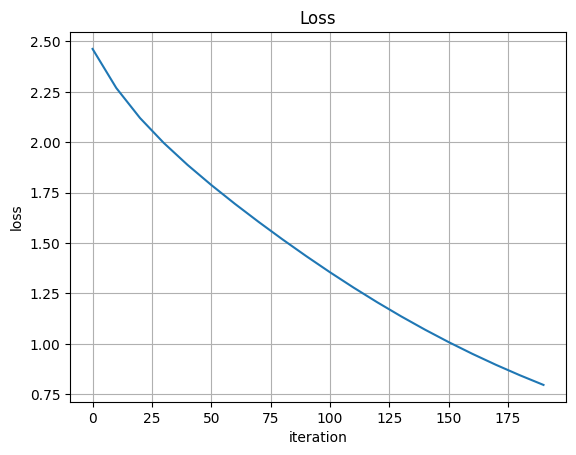

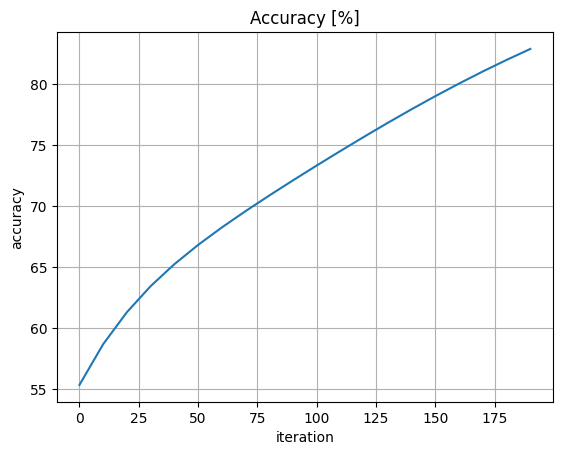

In [3]:
j = 0
loss_snapshot = []
accuracy_snapshot = []
iterations = 200
chart_filter = 10

for i in range(iterations):
    j = j + 1
    scores = list(map(model, X_train))
    loss = model.cross_entropy_loss(scores, y_train)
    if j == chart_filter:
        loss_snapshot.append(loss.data)
        accuracy_snapshot.append(model.accuracy(scores, y_train).data)
        j = 0
    model.optimize(loss, learning_rate = 0.01)


x_axis = np.arange(0.0, iterations, chart_filter)
y_axis = loss_snapshot
fig, ax = plt.subplots()
ax.plot(x_axis, y_axis)
ax.set(xlabel='iteration', ylabel='loss',
       title='Loss')
ax.grid()

y_axis = accuracy_snapshot
fig, ax = plt.subplots()
ax.plot(x_axis, y_axis)
ax.set(xlabel='iteration', ylabel='accuracy',
       title='Accuracy [%]')
ax.grid()

plt.show()